<a href="https://colab.research.google.com/github/graccelinn/optimization_project1/blob/main/RM294_Optimization_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RM294 OPTIMIZATION - PROJECT 1**

*Members: Melissa Cai Shi, Grace Lin, Abhigyan Pandya, and Franco Salinas*

In [2]:
# Collab requires to install Gurobi everytime
!pip install gurobipy

In [3]:
# load need libraries
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

### **Part 1: Load and prepare data**

In [4]:
# load 2019 and 2020 data
stocks_2019_df = pd.read_csv('stocks2019.csv', index_col=0)
stocks_2020_df = pd.read_csv('stocks2020.csv', index_col=0)

In [5]:
# calculate returns
returns_2019 = stocks_2019_df.pct_change().dropna()
returns_2020 = stocks_2020_df.pct_change().dropna()

In [6]:
# Remove NDX - this is the NASDAQ index, we want the individual stocks that make up the index/portfolio
returns_2019_clean = returns_2019.drop('NDX', axis=1)
returns_2020_clean = returns_2020.drop('NDX', axis=1)

In [7]:
# Take a look at the 2019 data
returns_2019_clean.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.035509,-0.039498,-0.094530,0.022030,-0.085791,-0.027696,-0.028484,-0.025242,-0.015216,-0.060405,...,-0.022834,-0.018591,-0.034989,-0.030557,-0.002133,-0.010435,-0.035808,-0.068217,-0.003940,-0.037651
2019-01-04,0.039903,0.048632,0.114370,0.057779,0.010445,0.051294,0.053786,0.050064,0.034184,0.024278,...,0.058976,0.047954,0.044744,0.044147,0.054785,0.033269,0.060577,0.042356,0.009786,0.046303
2019-01-07,0.028196,0.013573,0.082632,0.018302,0.017192,-0.001994,-0.002167,0.034353,0.013457,0.006288,...,0.022067,0.062620,0.016312,0.001000,0.018240,0.005749,0.000918,0.035522,-0.004330,0.026415
2019-01-08,0.030309,0.014918,0.008751,0.006207,0.015954,0.008783,0.007385,0.016612,0.012824,0.024396,...,0.010281,0.018450,0.036460,0.008902,0.013307,0.020009,0.021101,-0.009615,0.011597,-0.019051
2019-01-09,0.017210,0.011819,-0.026988,0.012430,0.038196,-0.003427,-0.001505,0.001714,-0.001196,0.025340,...,0.023745,0.018804,-0.008157,0.003781,0.023065,0.012050,-0.004612,0.044083,-0.007984,0.008972


In [8]:
# Take a look at the 2020 data
returns_2020_clean.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
1/3/20,0.000341,-0.007834,-0.010183,-0.013260,-0.011421,-0.005231,-0.004907,-0.012139,-0.006789,-0.017604,...,-0.021369,-0.017207,0.021095,0.009728,-0.006699,0.000000,0.005852,-0.015392,0.004809,-0.023020
1/6/20,0.018238,0.005726,-0.004321,0.001598,0.019398,0.026654,0.024657,0.014886,0.007674,-0.011749,...,-0.013543,0.003118,0.009259,0.002294,0.027755,0.008632,0.006234,-0.019192,-0.001436,-0.020844
1/7/20,0.010043,-0.000959,-0.002893,0.002533,-0.009864,-0.001932,-0.000624,0.002092,-0.009405,0.022751,...,0.045951,0.008528,0.002318,0.008369,-0.001071,-0.005035,0.020414,0.067698,-0.002077,0.022830
1/8/20,-0.007623,0.013438,-0.008705,0.016191,0.010386,0.007118,0.007880,-0.007809,0.000756,0.009032,...,-0.012323,0.019400,0.004626,0.009208,0.032620,-0.058357,0.033304,0.014484,-0.000961,-0.002815
1/9/20,-0.009018,0.007636,0.023834,0.019893,0.036853,0.010498,0.011044,0.004799,0.002980,0.000000,...,0.006781,0.021318,0.023169,0.009638,-0.003592,-0.020598,0.004309,-0.000291,0.002244,0.023493


In [9]:
# get total number of stocks
n_stocks = len(returns_2019_clean.columns)
n_stocks

100

## **Part 2: Finding portfolio that minimizes the daily average beta-CVaR using the 2019 data**

In [10]:
# === Part 2 – β-CVaR Minimization (β=0.95, R=0.02%) ===

p19 = pd.read_csv("stocks2019.csv", index_col=0)
p20 = pd.read_csv("stocks2020.csv", index_col=0)

r19, r20 = p19.pct_change().dropna(), p20.pct_change().dropna()
INDEX, BETA, R_FLOOR = "NDX", 0.95, 0.0002

assets = [c for c in r19.columns if c != INDEX]
Y, q, n = r19[assets].to_numpy(), *r19[assets].to_numpy().shape
mu = r19[assets].mean().to_numpy()

m = gp.Model("cvar"); m.Params.OutputFlag = 0
x   = m.addVars(n, lb=0.0)                       # weights
a   = m.addVar(lb=-GRB.INFINITY)                 # alpha (VaR proxy)
u   = m.addVars(q, lb=0.0)                       # tail slacks
m.addConstr(gp.quicksum(x[j] for j in range(n)) == 1)               # budget
m.addConstr(gp.quicksum(mu[j]*x[j] for j in range(n)) >= R_FLOOR)   # mean floor
for k in range(q): m.addConstr(-gp.quicksum(Y[k,j]*x[j] for j in range(n)) - a - u[k] <= 0)
m.setObjective(a + (1/((1-BETA)*q))*gp.quicksum(u[k] for k in range(q)), GRB.MINIMIZE)
m.optimize()

w = pd.Series([x[j].X for j in range(n)], index=assets)

#LLM assisted code
def var_cvar(wts, R, beta=BETA):
    pr = R[wts.index].to_numpy() @ wts.to_numpy()
    L  = -pr
    try:  v = np.quantile(L, beta, method="linear")
    except TypeError: v = np.quantile(L, beta, interpolation="linear")
    return float(v), float(L[L>=v-1e-12].mean())

v19, c19 = var_cvar(w, r19);  v20, c20 = var_cvar(w, r20)
ndx19 = var_cvar(pd.Series({INDEX:1.0}), r19[[INDEX]])[1]
ndx20 = var_cvar(pd.Series({INDEX:1.0}), r20[[INDEX]])[1]

print(f"\nPart 2 (β={BETA}, R≥{100*R_FLOOR:.3f}% daily)")
print(f"In-sample 2019: VaR={100*v19:.3f}%, CVaR={100*c19:.3f}%")
print(f"Out-of-sample 2020: VaR={100*v20:.3f}%, CVaR={100*c20:.3f}%")
print(f"NDX CVaR: 2019={100*ndx19:.3f}%, 2020={100*ndx20:.3f}%")
print("Top weights:\n", w.sort_values(ascending=False).head(10))


Set parameter Username
Set parameter LicenseID to value 2699471
Academic license - for non-commercial use only - expires 2026-08-25

Part 2 (β=0.95, R≥0.020% daily)
In-sample 2019: VaR=0.850%, CVaR=1.012%
Out-of-sample 2020: VaR=2.525%, CVaR=4.583%
NDX CVaR: 2019=2.441%, 2020=5.589%
Top weights:
 XEL     0.303917
CHTR    0.264965
AMGN    0.080766
CTXS    0.065614
CHKP    0.062696
EXC     0.052155
KHC     0.040510
CSX     0.034312
COST    0.030352
EBAY    0.023486
dtype: float64


#### When we optimize the portfolio on 2019 daily returns with β=0.95 and a daily return floor of 0.02%, the model produces a concentrated allocation, most notably into XEL (30.4%) and CHTR (26.5%), alongside smaller positions such as AMGN, CTXS, and CHKP. In-sample, the portfolio achieves a daily 95% CVaR of just 1.012%, far below the NDX benchmark’s 2.441%. However, when the same 2019 weights are carried into 2020, the out-of-sample CVaR rises sharply to 4.583%, compared with 5.589% for NDX. This large increase highlights the danger of assuming stationarity in financial returns: the market environment in 2020, shaped by COVID shocks, was fundamentally different from 2019. While the optimized portfolio still outperforms NDX, its risk profile more than quadruples. This demonstrates that sticking with the same portfolio across years is not advisable, and that regular re-optimization is necessary to adapt to changing market regimes.

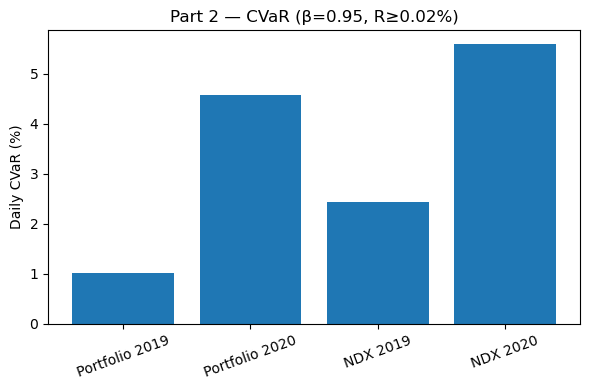

In [16]:
## Portfolio Daily CVaR 2019 vs 2020

import matplotlib.pyplot as plt

# assumes you already ran Part 2 and have: c19, c20, ndx19, ndx20
labels = ["Portfolio 2019", "Portfolio 2020", "NDX 2019", "NDX 2020"]
vals   = [100*c19, 100*c20, 100*ndx19, 100*ndx20]

plt.figure(figsize=(6,4))
plt.bar(labels, vals)
plt.ylabel("Daily CVaR (%)")
plt.title("Part 2 — CVaR (β=0.95, R≥0.02%)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
# plt.savefig("part2_cvar_comparison.png", dpi=200)


## **Part 3: Rerun part 2 with beta=0.9, beta=0.99**

In [12]:
# === Part 3 — rerun Part 2 with β = 0.90 and β = 0.99 (same variables as Part 2) ===
for beta in [0.90, 0.99]:
    m = gp.Model(f"cvar_beta_{beta}"); m.Params.OutputFlag = 0
    x = m.addVars(n, lb=0.0)
    a = m.addVar(lb=-GRB.INFINITY)
    u = m.addVars(q, lb=0.0)

    m.addConstr(gp.quicksum(x[j] for j in range(n)) == 1)
    m.addConstr(gp.quicksum(mu[j]*x[j] for j in range(n)) >= R_FLOOR)
    for k in range(q):
        m.addConstr(-gp.quicksum(Y[k, j]*x[j] for j in range(n)) - a - u[k] <= 0)

    m.setObjective(a + (1/((1-beta)*q))*gp.quicksum(u[k] for k in range(q)), GRB.MINIMIZE)
    m.optimize()

    w_beta = pd.Series([x[j].X for j in range(n)], index=assets)
    _, cvar19 = var_cvar(w_beta, r19, beta)
    _, cvar20 = var_cvar(w_beta, r20, beta)

    print(f"\n=== Part 3 — β={beta} ===")
    print(f"In-sample 2019 CVaR = {100*cvar19:.3f}%")
    print(f"Out-of-sample 2020 CVaR = {100*cvar20:.3f}%")
    print("Top 5 weights:\n", w_beta.sort_values(ascending=False).head(5))



=== Part 3 — β=0.9 ===
In-sample 2019 CVaR = 0.775%
Out-of-sample 2020 CVaR = 3.209%
Top 5 weights:
 CHTR    0.240605
XEL     0.212977
MDLZ    0.136573
EXC     0.064285
WBA     0.052900
dtype: float64

=== Part 3 — β=0.99 ===
In-sample 2019 CVaR = 1.245%
Out-of-sample 2020 CVaR = 9.089%
Top 5 weights:
 XEL     0.447035
CHTR    0.248055
CTXS    0.089074
KHC     0.067269
NTES    0.051005
dtype: float64


#### Repeating the optimization with alternative confidence levels shows how β shapes both portfolio construction and risk. At β=0.90, the model minimizes losses across the worst 10% of days, leading to a somewhat more diversified allocation with holdings like CHTR, XEL, MDLZ, EXC, and WBA. This portfolio achieved the lowest out-of-sample 2020 CVaR (3.209%), suggesting that a broader view of the tail produced more robust performance. The baseline β=0.95 allocation is slightly more concentrated, with higher 2020 CVaR at 4.583%. At the extreme, β=0.99 focuses only on the worst 1% of days in 2019 and responds by heavily concentrating in XEL (44.7%) and CHTR (24.8%). While this improved in-sample tail protection, it collapsed out-of-sample, with 2020 CVaR ballooning to 9.089%. These results illustrate that the choice of β meaningfully changes allocations: lower β values encourage diversification and smoother performance, while very high β values can overfit to a narrow slice of history and fail under new conditions.

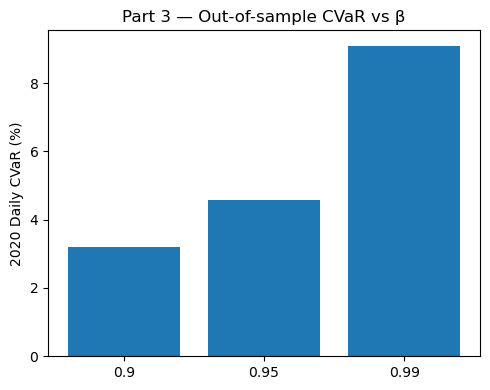

In [15]:
## 2020 CVaR vs Beta Bar Chart

beta_list, cvar20_list = [], []

for beta in [0.90, 0.95, 0.99]:
    if beta == 0.95:
        w_b = w  # reuse Part 2 weights you already solved for β=0.95
    else:
        m = gp.Model(f"cvar_beta_{beta}"); m.Params.OutputFlag = 0
        x = m.addVars(n, lb=0.0); a = m.addVar(lb=-GRB.INFINITY); u = m.addVars(q, lb=0.0)
        m.addConstr(gp.quicksum(x[j] for j in range(n)) == 1)
        m.addConstr(gp.quicksum(mu[j]*x[j] for j in range(n)) >= R_FLOOR)
        for k in range(q):
            m.addConstr(-gp.quicksum(Y[k,j]*x[j] for j in range(n)) - a - u[k] <= 0)
        m.setObjective(a + (1/((1-beta)*q))*gp.quicksum(u[k] for k in range(q)), GRB.MINIMIZE)
        m.optimize()
        w_b = pd.Series([x[j].X for j in range(n)], index=assets)

    _, cvar20_b = var_cvar(w_b, r20, beta)
    beta_list.append(beta); cvar20_list.append(100*cvar20_b)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.bar([str(b) for b in beta_list], cvar20_list)
plt.ylabel("2020 Daily CVaR (%)")
plt.title("Part 3 — Out-of-sample CVaR vs β")
plt.tight_layout()
plt.show()
# plt.savefig("part3_cvar20_vs_beta.png", dpi=200)


## **Part 4: Conservative risk management approach**

## **Part 5: Monthly Update/Allocation**

## **Part 6: Stable Portfolio**